In [3]:
# Simulación de proceso MA(1), esto es , ARMA(0,1)
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

In [15]:
ar1=np.array([1,0])
mal=np.array([1,-.9])

In [17]:
MA_object1= ArmaProcess(ar1,mal)
simulated_data= MA_object1.generate_sample(nsample=10000)

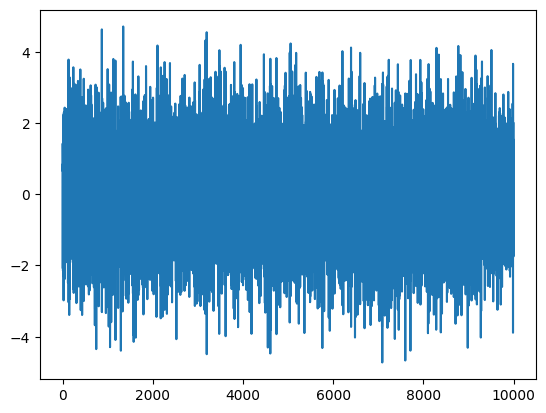

In [19]:
import matplotlib.pyplot as plt
plt.plot(simulated_data)

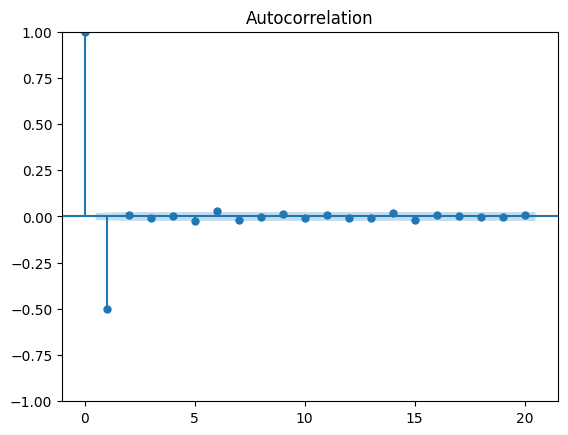

In [21]:
# grafia correlograma con 20 retrasos para validar la autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data, lags=20)
plt.show()
# autocorrelación negativa, nos guiamos de la segunda barra graficada

In [25]:
# proceso de estimación de parámetro
# en order(0,0,1) el primer cero es el parametro de autoregresión, el segundo 0 es el parámetro integrado y el 1 es de la media movil
# al sólo poner el 1 al útimo, sólo se usará la media movil para la estimación de parámetros
from statsmodels.tsa.arima.model import ARIMA
mod= ARIMA(simulated_data, order=(0,0,1))
result=mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -14260.562
Date:                Mon, 16 Jun 2025   AIC                          28527.124
Time:                        17:40:40   BIC                          28548.755
Sample:                             0   HQIC                         28534.446
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.164      0.870      -0.002       0.002
ma.L1         -0.8981      0.004   -201.958      0.000      -0.907      -0.889
sigma2         1.0142      0.014     71.824      0.0

In [27]:
print(result.params[1])

-0.8980981155250357


In [29]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [31]:
# extracción de precios históricos
apple=yf.download(tickers="aapl", start= "2021-04-06", end="2023-04-06", rounding=True)
apple

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-04-06,123.30,124.20,122.75,123.59,80171300
2021-04-07,124.95,124.97,122.26,122.93,83466700
2021-04-08,127.36,127.39,125.56,125.98,88844600
2021-04-09,129.94,129.97,126.49,126.81,106686700
2021-04-12,128.22,129.79,127.62,129.47,91420000
...,...,...,...,...,...
2023-03-30,160.53,160.64,159.45,159.71,49501700
2023-03-31,163.04,163.14,160.08,160.61,68749800


In [33]:
apple= apple["Close"]
apple

Ticker,AAPL
Date,
2021-04-06,123.30
2021-04-07,124.95
2021-04-08,127.36
2021-04-09,129.94
2021-04-12,128.22
...,...
2023-03-30,160.53
2023-03-31,163.04
2023-04-03,164.30


In [35]:
# Definición de grupos de prueba y entrenamiento
len_train= int(len(apple)*.8)
len_test= int(len(apple)*.2)
train= apple[0:len_train]
test=apple[len_train:]

In [41]:
mod= ARIMA(train, order=(0,0,1))
result=mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  404
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1416.618
Date:                Mon, 16 Jun 2025   AIC                           2839.236
Time:                        17:53:35   BIC                           2851.240
Sample:                             0   HQIC                          2843.987
                                - 404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.7110      0.780    190.544      0.000     147.181     150.241
ma.L1          0.9279      0.020     45.325      0.000       0.888       0.968
sigma2        64.7284      5.629     11.499      0.0

In [43]:
# a partir del segundo se mantiene en 148.711 al haber usado sólo promedios móviles
predicciones= result.forecast(len(test))
predicciones

404    142.113190
405    148.711021
406    148.711021
407    148.711021
408    148.711021
          ...    
500    148.711021
501    148.711021
502    148.711021
503    148.711021
504    148.711021
Name: predicted_mean, Length: 101, dtype: float64

In [47]:
predicciones= pd.DataFrame(predicciones)

In [53]:
# se resetean los índices par que estos concuerden entre el dataframe de predicciones y de test
predicciones=predicciones.reset_index()
test= test.reset_index()

In [55]:
test

Ticker,Date,AAPL
0,2022-11-09,133.15
1,2022-11-10,144.99
2,2022-11-11,147.79
3,2022-11-14,146.38
4,2022-11-15,148.12
...,...,...
96,2023-03-30,160.53
97,2023-03-31,163.04
98,2023-04-03,164.30
99,2023-04-04,163.76


In [57]:
predicciones

,index,predicted_mean
0,404,142.113190
1,405,148.711021
2,406,148.711021
3,407,148.711021
4,408,148.711021
...,...,...
96,500,148.711021
97,501,148.711021
98,502,148.711021
99,503,148.711021


In [59]:
acumulador1=0
acumulador2=0

for contador in range (0,101):
    acumulador1= acumulador1+(test.iloc[contador][1]-predicciones.iloc[contador][1])**2
    acumulador2= acumulador2+np.abs((test.iloc[contador][1]-predicciones.iloc[contador][1])/test.iloc[contador][1])

mse=acumulador1/101
rmse=np.round(np.sqrt(mse),2)
mape=np.round((acumulador2/101)*100,2)
print("RMSE=",rmse, "MAPE=", mape, "%")

RMSE= 10.66 MAPE= 3.0 %


In [73]:
import os
os.chdir("C:/Users/odela/Downloads")
df= pd.read_csv("TempNY.csv")
df

,Year,Average,Unnamed: 2
0,1870,53.60,NaN
1,1871,51.13,NaN
2,1872,50.98,NaN
3,1873,50.98,NaN
4,1874,51.34,NaN
...,...,...,...
146,2016,57.18,NaN
147,2017,56.22,NaN
148,2018,55.88,NaN
149,2019,55.62,NaN


In [75]:
df= df.drop(["Unnamed: 2"],axis=1)
df

,Year,Average
0,1870,53.60
1,1871,51.13
2,1872,50.98
3,1873,50.98
4,1874,51.34
...,...,...
146,2016,57.18
147,2017,56.22
148,2018,55.88
149,2019,55.62


In [77]:
# Cambio de índice principal
df.index= df["Year"]
df= df.drop(["Year"], axis=1)
df

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


<Axes: xlabel='Year'>

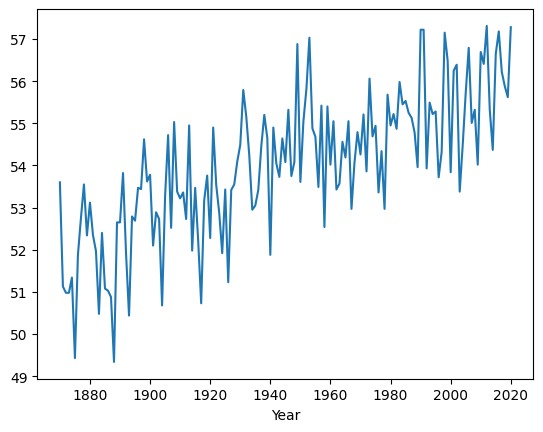

In [79]:
df["Average"].plot()

In [87]:
# si el promedio de los datos es significativamente diferente, no es estacionario
# prueba de estacionalidad de Dickey-Fuller
# HO: serie no estacionaria ( la media va cambiando a lo largo del tiempo)
# HA la serie sí es estacionaria

from statsmodels.tsa.stattools import adfuller
result= adfuller(df["Average"])
print("El valor p de la prueba es de:", result[1])
# No se puede rechazar la hipótesis nula

El valor p de la prueba es de: 0.8417172538965364


### no hay evidencia estadística para rechazar HO y por lo tanto decir que la serie es estacionaria

In [91]:
# Apliar primeras diferencias para intentar convertir esta serie a una estacionaria

df["temp_change"]= df["Average"].diff()
df

,Average,temp_change
Year,,
1870,53.60,NaN
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
...,...,...
2016,57.18,0.53
2017,56.22,-0.96
2018,55.88,-0.34


In [93]:
df=df.dropna()
df

,Average,temp_change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91
...,...,...
2016,57.18,0.53
2017,56.22,-0.96
2018,55.88,-0.34


In [97]:
# Aplicación de la prueba Dickey_Fuller sobre las diferencias

result2= adfuller(df["temp_change"])
print("El valor p de la prueba es de:", result2[1])
# ahora sí es menor a 5%, por lo tanto sí se puede rechazar la hipótesis nula

El valor p de la prueba es de: 8.361907414786182e-14


<Axes: xlabel='Year'>

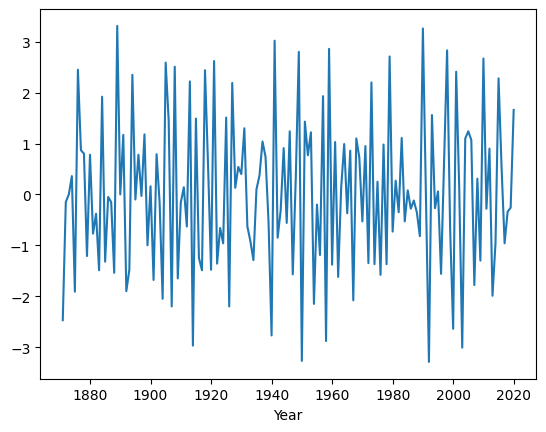

In [99]:
df["temp_change"].plot()
# Gráfio de serie estacionaria

### Conclusión: la serie transformada de diferencias sí es estacionaria

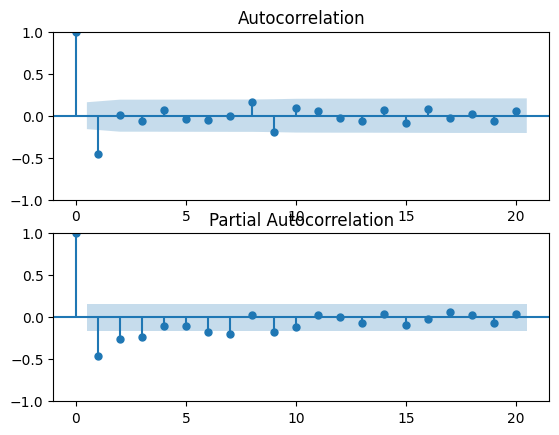

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes= plt.subplots(2,1)
#ax= axes es para definir el orden de los gráficos 
# Graficación de función de autocorrelación ACF
plot_acf(df["temp_change"],lags=20, ax=axes[0], alpha=.05)

#Graficación de función de autocorrelación parcial PACF
plot_pacf(df["temp_change"],lags=20, ax=axes[1], alpha=.05)

plt.show()
#retraso muy significativo, por lo tanto sí se podría utilizar alguno de estos modelos para predecir

In [108]:
# importación del módulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

#Ajustar los datos a un modelo AR(1) e imprimir su AIC:  AKAIKE
mod_ar1=  ARIMA(df["temp_change"],order= (1,0,0))
res_ar1= mod_ar1.fit()
print("El AIC para AR(1) es:", res_ar1.aic)

El AIC para AR(1) es: 519.9693852277926


In [114]:
#Ajustar los datos a un modelo AR(2) e imprimir su AIC:  AKAIKE
mod_ar2=  ARIMA(df["temp_change"],order= (2,0,0))
res_ar2= mod_ar2.fit()
print("El AIC para AR(1) es:", res_ar2.aic)
# mejora, ya que disminuye

El AIC para AR(1) es: 510.48447045590717


In [116]:
#Ajustar los datos a un modelo AR(1) con media movil e imprimir su AIC:  AKAIKE
mod_ar11=  ARIMA(df["temp_change"],order= (1,0,1))
res_ar11= mod_ar11.fit()
print("El AIC para AR(1) es:", res_ar11.aic)
# mejora más, ya que disminuye

El AIC para AR(1) es: 473.8297506222866


### conclusión: la serie de tiempo original de temperatura se modela bien con ARIMA (1,1,1) EL segundo 1 viene de haber aplicado las diferencias

In [121]:
df= pd.read_csv("TempNY.csv")
df= df.drop(["Unnamed: 2"], axis=1)
df.index= df["Year"]
df= df.drop(["Year"], axis=1)
df

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


In [125]:
# importación de modulo ARIMA de statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#Pronostico de temperaturas usando un modelo ARIMA(1,1,1) aquí sí se pone el segundo 1, ya que se está usando la base original sin realizar las diferencias
mod=ARIMA(df["Average"],order=(1,1,1))
res=mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -238.826
Date:                Mon, 16 Jun 2025   AIC                            483.652
Time:                        21:36:38   BIC                            492.683
Sample:                             0   HQIC                           487.321
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0646      0.109      0.590      0.555      -0.150       0.279
ma.L1         -0.8669      0.057    -15.261      0.000      -0.978      -0.756
sigma2         1.4020      0.199      7.043      0.0

In [127]:
# el coeficiente autoregresivo es de .0646
# para promedios moviles es -.8 669 

In [131]:
#pronóstico para los próximos 5 años
predicciones= res.forecast(5)
predicciones

151    56.150447
152    56.077505
153    56.072795
154    56.072490
155    56.072471
Name: predicted_mean, dtype: float64

In [133]:
# pronóstico por intervalo de los próximos 5 años
conf= res.get_forecast(5).conf_int(alpha=.05)
conf

,lower Average,upper Average
151,53.829710,58.471183
152,53.711871,58.443138
153,53.683072,58.462517
154,53.659996,58.484985
155,53.637485,58.507456
